**Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline


# Loading the Dataset

In [ ]:
sample_submission = pd.read_csv('/content/sample_BM.csv')

In [ ]:
# Reading Dataset Train.csv
train = pd.read_csv('/content/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Reading Dataset Test.csv
test = pd.read_csv('/content/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.shape

(8523, 12)

In [ ]:
test.shape

(5681, 11)

# Exploratory Data Analysis

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
# Summary of Dataset Train
train.describe(include=[object, np.number]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Summary of Dataset Test
test.describe(include=[object, np.number]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,5681,1543,DRF48,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4705.0,NaN,NaN,NaN,12.695633,4.664849,4.555,8.645,12.5,16.7,21.35
Item_Fat_Content,5681,5,Low Fat,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,5681.0,NaN,NaN,NaN,0.065684,0.051252,0.0,0.027047,0.054154,0.093463,0.323637
Item_Type,5681,16,Snack Foods,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,5681.0,NaN,NaN,NaN,141.023273,61.809091,31.99,94.412,141.4154,186.0266,266.5884
Outlet_Identifier,5681,10,OUT027,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,5681.0,NaN,NaN,NaN,1997.828903,8.372256,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,4075,3,Medium,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,5681,3,Tier 3,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Exploration**

##  Data visualization

Univariate plots

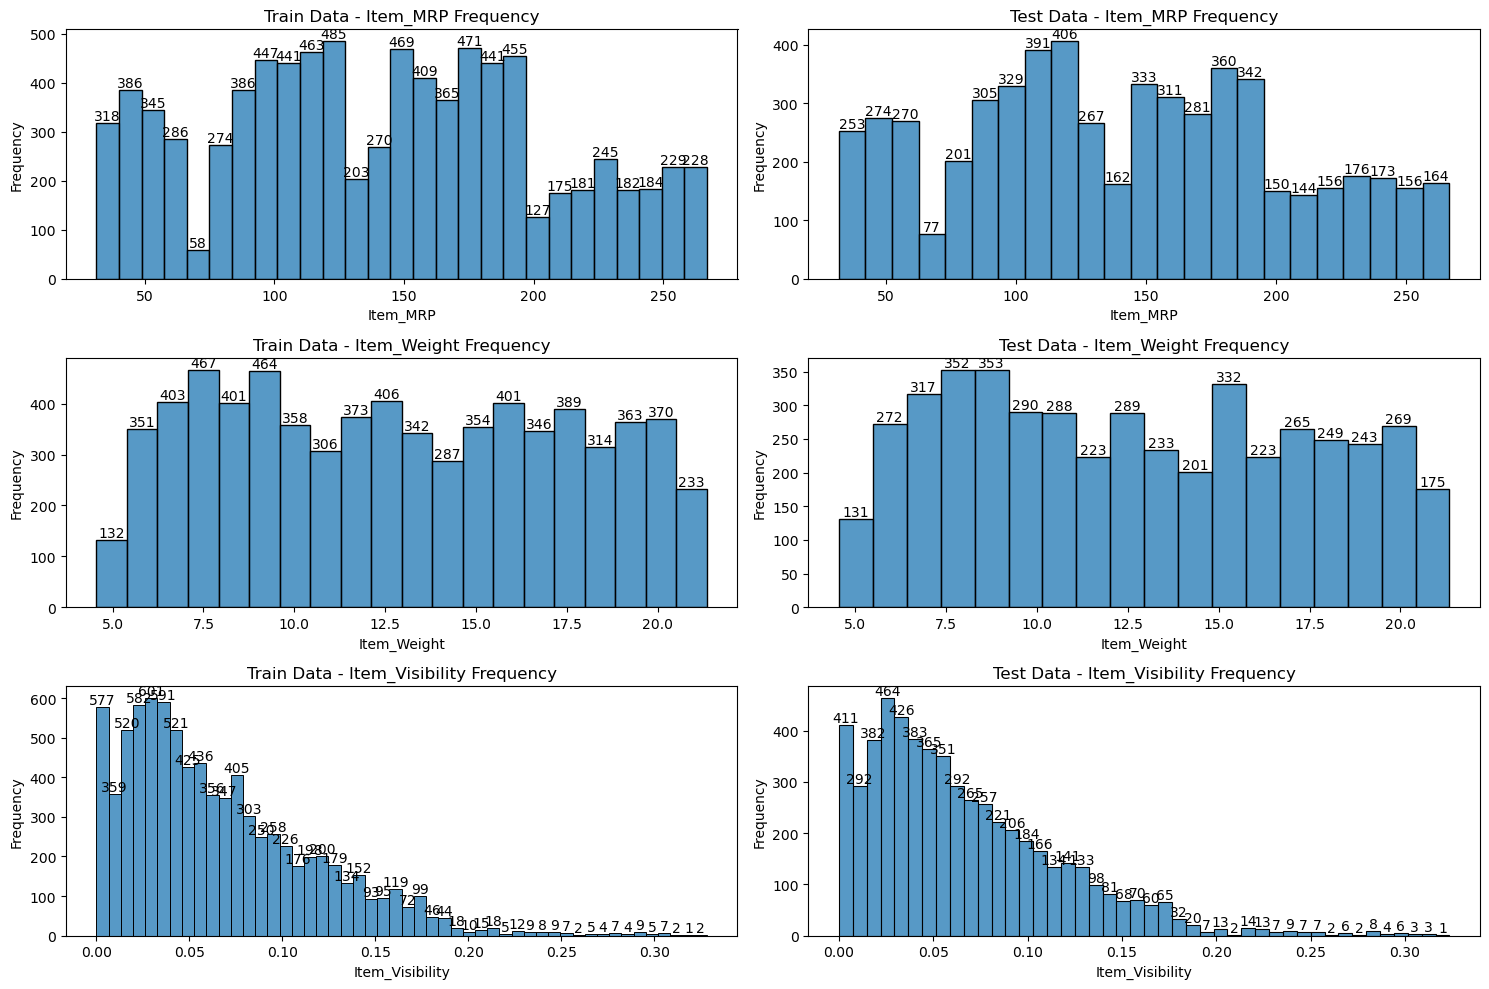

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]

for i, label in enumerate(columns):
    row = i
    ax1 = sns.histplot(train[label], ax=axes[row, 0])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    ax2 = sns.histplot(test[label], ax=axes[row, 1])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

Visualizing Discrete Data Spread


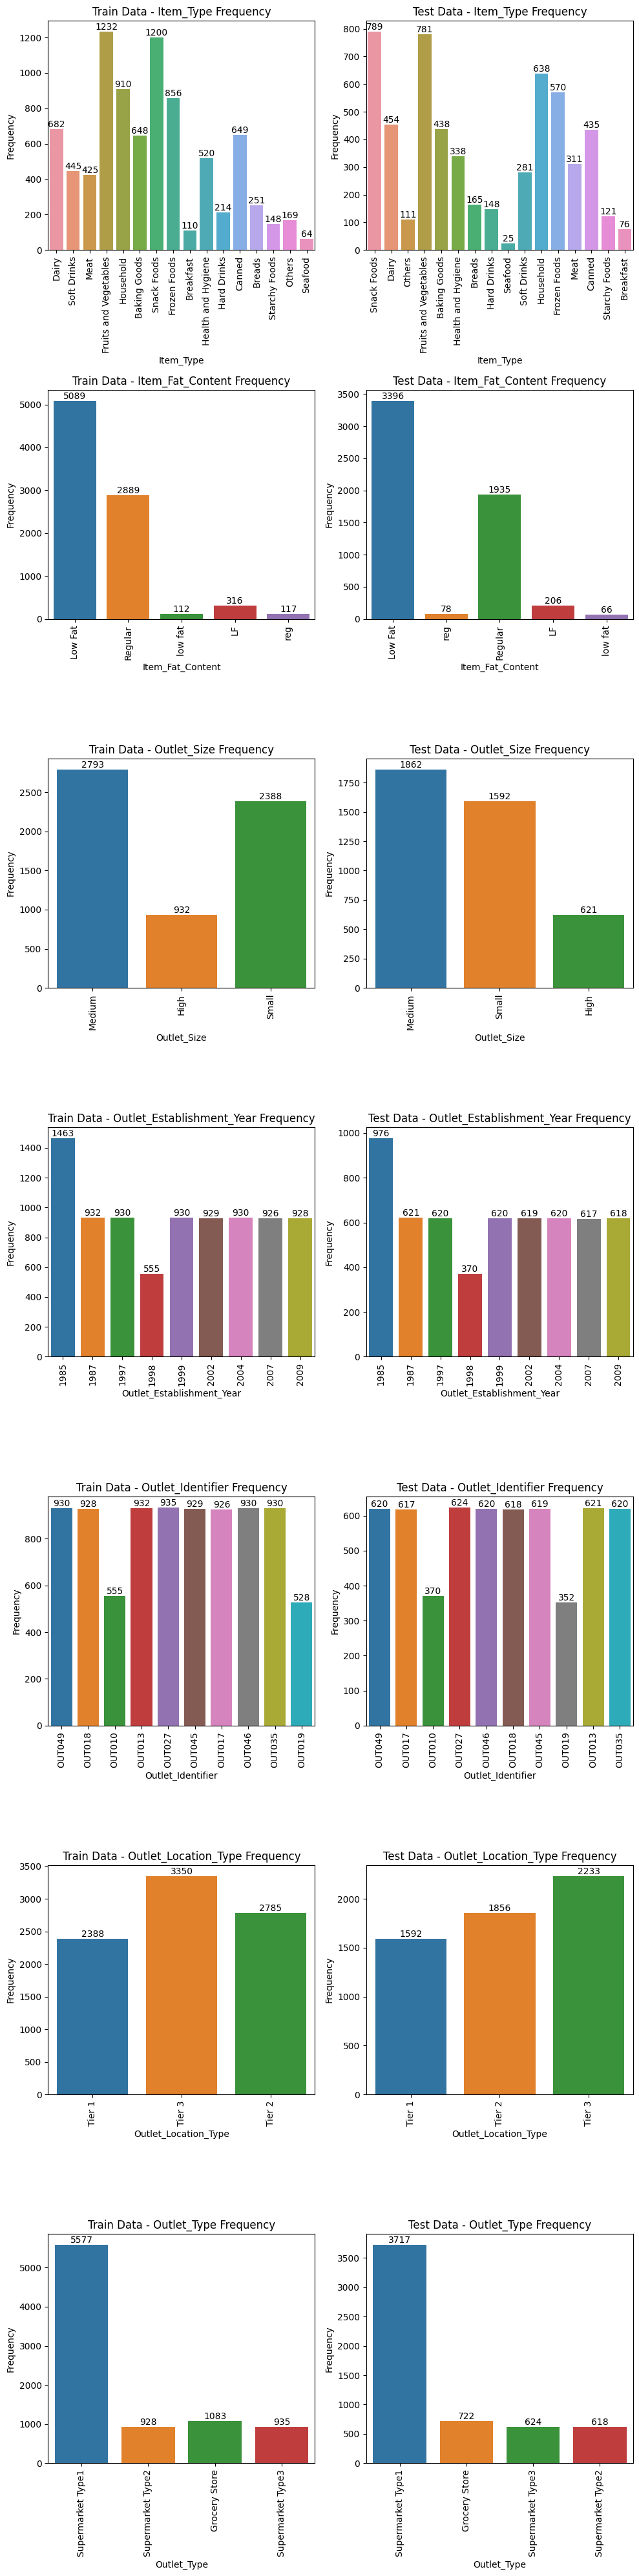

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 40))
columns = ["Item_Type", "Item_Fat_Content", "Outlet_Size", "Outlet_Establishment_Year", "Outlet_Identifier",
           "Outlet_Location_Type", "Outlet_Type"]
print("Visualizing Discrete Data Spread")
for i, label in enumerate(columns):
    row = i
    col1 = 0
    ax1 = sns.countplot(data=train, x=label, ax=axes[row, col1])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    col2 = 1
    ax2 = sns.countplot(data=test, x=label, ax=axes[row, col2])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()


1. **Item_Typ**e: Fruits $ Vegetables are popular in train and snacks foods are from test.
1. **Item_Fat_Content**: Most items sold are Low_Fat.
2. **Outlet_Size**: Medium stores are high.
2. **Outlet_Location_Type**: Most comon type of location is Tier3
1. **Outlet_Type**: Most Store Types are SuperMarket Type 1.




### Bivariate plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


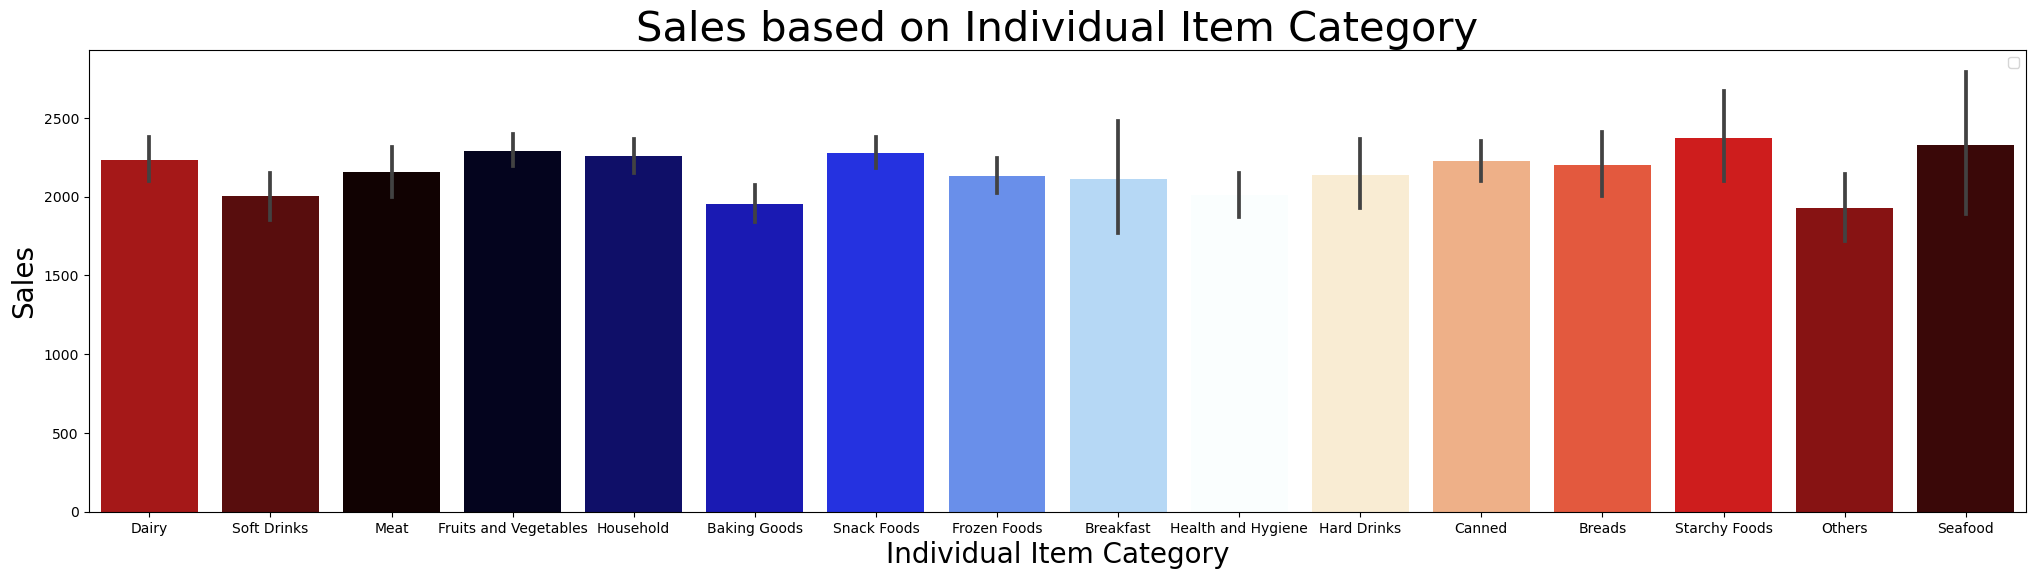

In [ ]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=train,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


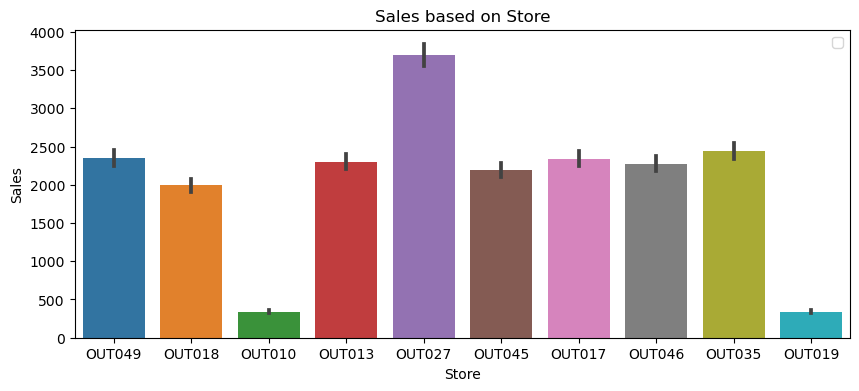

In [ ]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=train,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


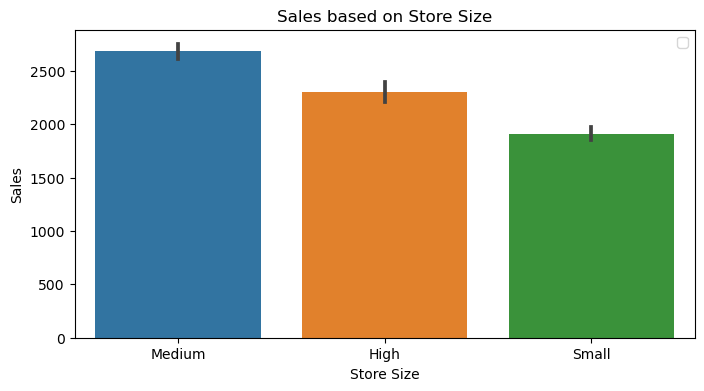

In [ ]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=train,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()


1.  **Item_Type**: Seafood has most sales,but difference is small.
2.   **Outlet_Identifier**: Outlet027 has most profitable.
1.   **Outlet_Size**: Sales are mostly in Medium stores.






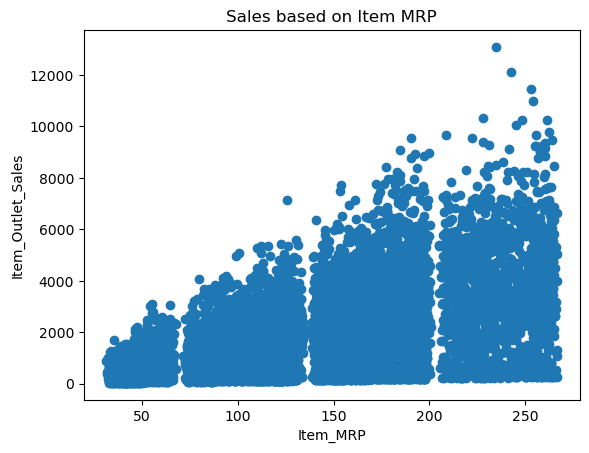

In [ ]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

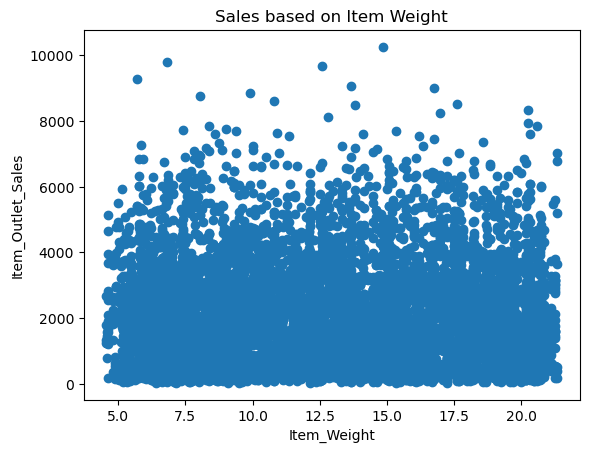

In [ ]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()



1.   **Item_Weight**: Not a particular Pattern,Data is very spreaded.
2.   **Item_MRP**: Items with higer MRP Sales tends to sell better.



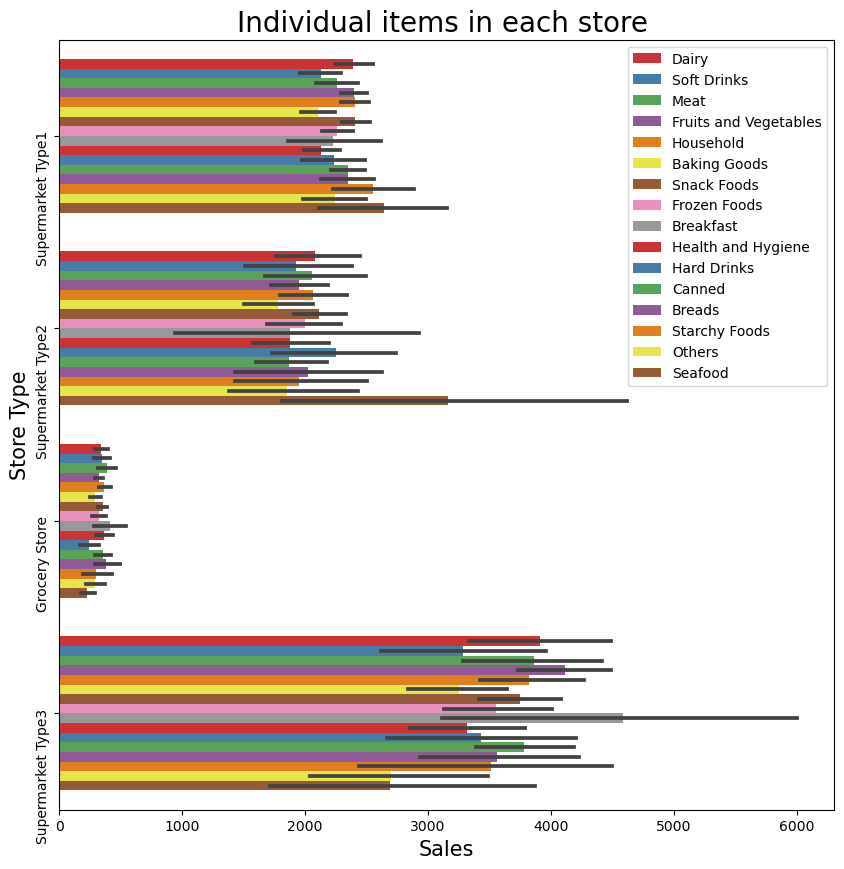

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=train,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

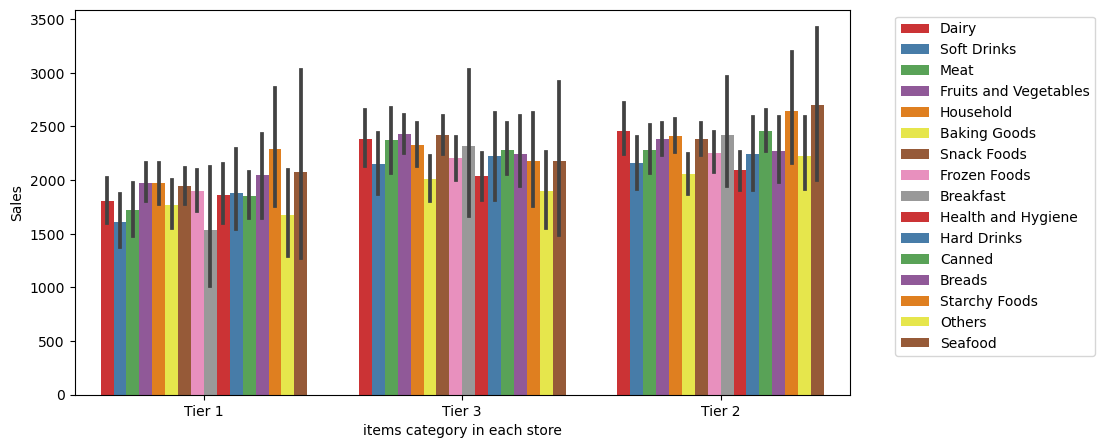

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

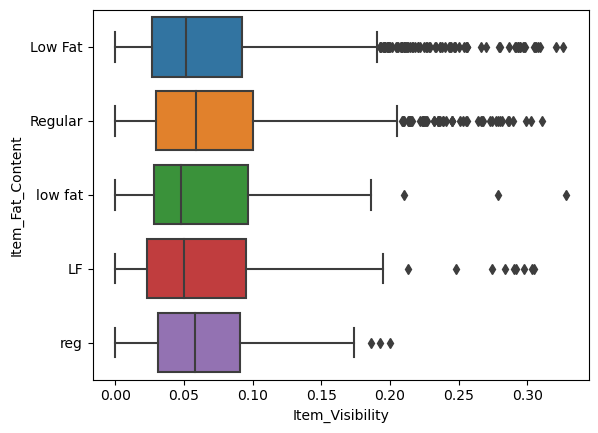

In [ ]:
# columns Item_Visibility and Item_Fat_Content
sns.boxplot(x = train['Item_Visibility'], y = train['Item_Fat_Content'])
plt.show()

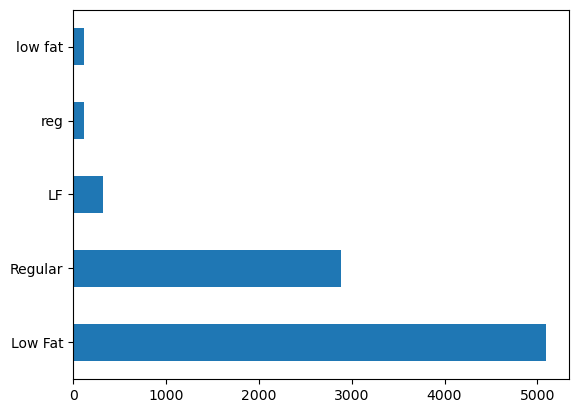

In [ ]:
#Item_Fat_Content
train['Item_Fat_Content'].value_counts().plot(kind='barh')
plt.show()

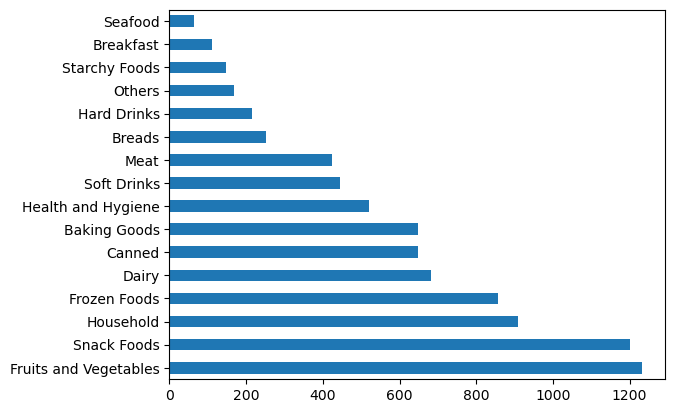

In [ ]:
#Item_Type column
train['Item_Type'].value_counts().plot(kind='barh')
plt.show()

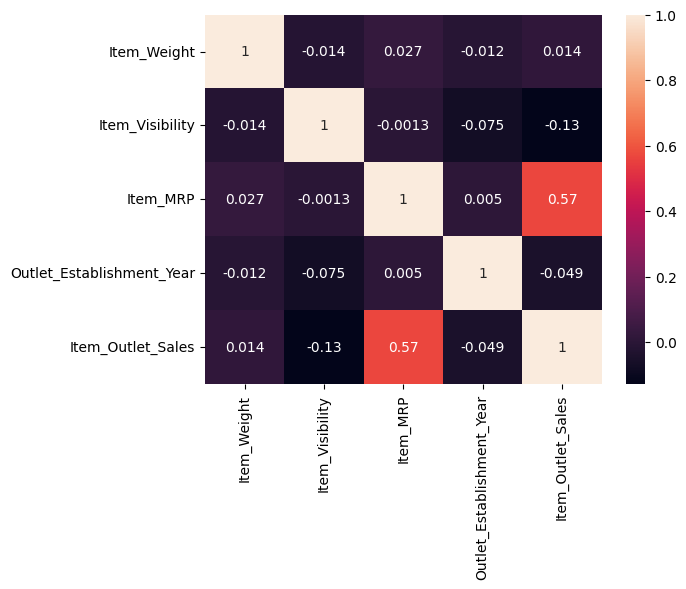

In [ ]:
# heatmap for the co-relation
num_columns = train.select_dtypes(include=['float64','int64'])
sns.heatmap(num_columns.corr(),annot=True)
plt.show()

Handling the missing values

In [ ]:
null = pd.DataFrame({'Null Values' : train.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : train.isnull().sum().sort_values(ascending=False)/train.shape[0] * 100})
null

,Null Values,Percentage Null Values
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [ ]:
null = pd.DataFrame({'Null Values' : test.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : test.isnull().sum().sort_values(ascending=False)/test.shape[0] * 100})
null

,Null Values,Percentage Null Values
Outlet_Size,1606,28.269671
Item_Weight,976,17.180074
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [ ]:
# skewness of the numerical columns
skewness = num_columns.apply(lambda x:x.skew())
print('Skewness of the numerical columns: \n',skewness)

Skewness of the numerical columns: 
 Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


In [ ]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)

train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)


In [ ]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
#Replace reapted values in Item_Fat_Content
train['Item_Fat_Content'] = train.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])

In [ ]:
# Replace reapted values in Item_Fat_Content
test['Item_Fat_Content'] = test.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])

In [ ]:
# change Establishment_Year to Outlet_Age
train['Oultet_Age'] = 2013 - train['Outlet_Establishment_Year']

In [ ]:
test['Oultet_Age'] = 2013 - test['Outlet_Establishment_Year']

In [ ]:
#changing the 0 values into mean of the column
train.loc[:, 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace=True)

In [ ]:
test.loc[:, 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace=True)

In [ ]:
# Combine Item_Type, and create new category
train['Item_Type_Combined'] = train.Item_Identifier.apply(lambda x:x[0:2])

In [ ]:
# Combine Item_Type, and create new category
test['Item_Type_Combined'] = test.Item_Identifier.apply(lambda x:x[0:2])

In [ ]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable'])
train.Item_Type_Combined.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [ ]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable'])
test.Item_Type_Combined.value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Oultet_Age                   0
Item_Type_Combined           0
dtype: int64

In [ ]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Oultet_Age                   0
Item_Type_Combined           0
dtype: int64

In [ ]:
#Item_Fat_Content'
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
pd.crosstab(index=train['Outlet_Size'], columns=train['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


Outlier Detection and Removal

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

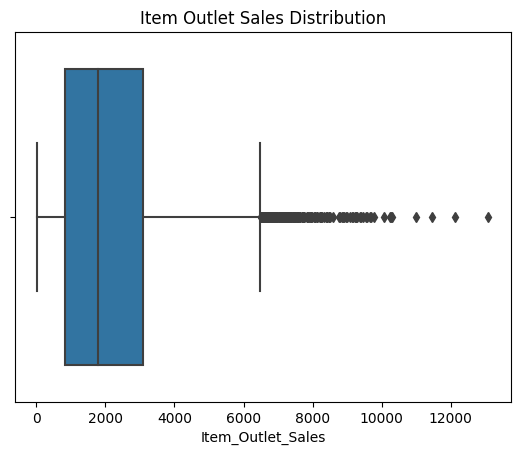

In [ ]:
#Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=train['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')

In [ ]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train, "Item_Outlet_Sales")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

Upper limit:  6501.8699
Lower limit:  -2566.3261


Text(0.5, 1.0, 'Item Visibility')

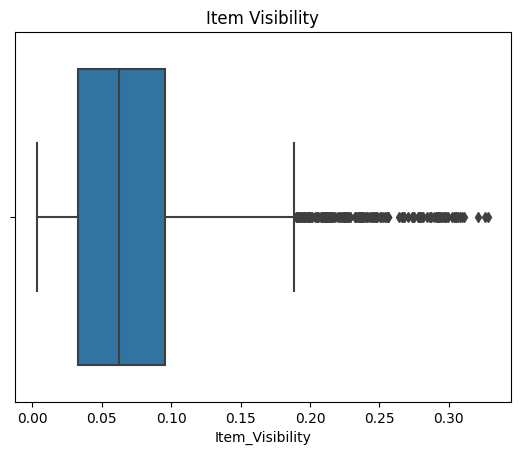

In [ ]:
sns.boxplot(x=train['Item_Visibility'])
plt.title('Item Visibility')

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train = train[(train['Item_Visibility'] > lower) & (train['Item_Visibility'] < upper)]

Upper limit:  0.1886238
Lower limit:  -0.06024273600000002


# Hypothesis Testing

In [ ]:
# chi-square test to check the co-relation

In [ ]:
# import chi2 contingency
from scipy.stats import chi2_contingency

In [ ]:
#  define a function for chi square test
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(cont_table)
  if p < 0.05:
    print('Accept the Alternate Hypothesis (There is a realation between var1 and var2)', round(p, 2))
  else:
    print('Failed to Reject Null Hypothesis (There is no relation between var1 and var2)', round(p, 2))
  return cont_table

In [ ]:
chi_sq_test(train['Outlet_Size'], train['Outlet_Location_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,917
Medium,919,1827,2235
Small,1364,914,0


In [ ]:
chi_sq_test(train['Item_Fat_Content'], train['Item_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,318,136,35,324,400,437,601,207,505,877,164,166,36,656,359,78
Regular,302,105,66,302,247,391,572,0,0,0,245,0,24,496,66,61


# Data Preparation

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8176 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8176 non-null   object 
 1   Item_Weight                8176 non-null   float64
 2   Item_Fat_Content           8176 non-null   object 
 3   Item_Visibility            8176 non-null   float64
 4   Item_Type                  8176 non-null   object 
 5   Item_MRP                   8176 non-null   float64
 6   Outlet_Identifier          8176 non-null   object 
 7   Outlet_Establishment_Year  8176 non-null   int64  
 8   Outlet_Size                8176 non-null   object 
 9   Outlet_Location_Type       8176 non-null   object 
 10  Outlet_Type                8176 non-null   object 
 11  Item_Outlet_Sales          8176 non-null   float64
 12  Oultet_Age                 8176 non-null   int64  
 13  Item_Type_Combined         8176 non-null   objec

In [ ]:
train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Oultet_Age', 'Item_Type_Combined'],
      dtype='object')

In [ ]:
test.shape

(5681, 10)

In [ ]:
test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Oultet_Age', 'Item_Type_Combined'],
      dtype='object')

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oultet_Age,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15,Food
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [ ]:
train.shape

(8176, 11)

# Feature Engineering

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

train['Item_Type_Combined'] = le.fit_transform(train['Item_Type_Combined'])
test['Item_Type_Combined'] = le.fit_transform(test['Item_Type_Combined'])


In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oultet_Age,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,0
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,1
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15,1
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,2


One hot encoding

In [ ]:
train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
test = pd.get_dummies(test, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Oultet_Age,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,14,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,4,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,14,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,732.3800,15,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,994.7052,26,2,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8176 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8176 non-null   float64
 1   Item_Visibility                  8176 non-null   float64
 2   Item_MRP                         8176 non-null   float64
 3   Item_Outlet_Sales                8176 non-null   float64
 4   Oultet_Age                       8176 non-null   int64  
 5   Item_Type_Combined               8176 non-null   int64  
 6   Item_Fat_Content_Low Fat         8176 non-null   uint8  
 7   Item_Fat_Content_Regular         8176 non-null   uint8  
 8   Item_Type_Baking Goods           8176 non-null   uint8  
 9   Item_Type_Breads                 8176 non-null   uint8  
 10  Item_Type_Breakfast              8176 non-null   uint8  
 11  Item_Type_Canned                 8176 non-null   uint8  
 12  Item_Type_Dairy     

# Data Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
cols = ['Item_Weight','Item_Visibility','Item_MRP']

for col in cols:
    test[col] = std.fit_transform(test[col].values.reshape(-1, 1))

In [ ]:
y = train['Item_Outlet_Sales']
x = train.drop(['Item_Outlet_Sales'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 33)
(2044, 33)
(6132,)
(2044,)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)

In [ ]:
# Model Evaluation
def model_eval(actual, predicted):
  rmse = np.sqrt(MSE(actual, predicted))
  r2 = R2(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,2))
  print('The R2 Score for the model is: ', round(r2, 2))

In [ ]:
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [ ]:
model_eval(y_train, lr_train)

The RMSE value for the model is:  1011.8
The R2 Score for the model is:  0.55


In [ ]:
model_eval(y_test, lr_test)


The RMSE value for the model is:  993.64
The R2 Score for the model is:  0.55


In [ ]:
cross_val(LinearRegression(),x,y,5)

LinearRegression() Scores:
0.55
0.55
0.53
0.55
0.55
Average LinearRegression() score: 0.5446


In [ ]:
y_predict=lr.predict(pd.DataFrame(test))

In [ ]:
print(pd.DataFrame(y_predict))


                0
0      537.058846
1      461.408351
2    -1772.844872
3      590.793050
4     1072.078975
...           ...
5676   552.236561
5677  -303.956704
5678   119.233608
5679   423.504740
5680    38.461875

[5681 rows x 1 columns]


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
ls = Lasso(alpha=0.05)

# Fit
ls.fit(x_train, y_train)

# Predict
y_predict_lasso = ls.predict(x_test)

In [ ]:
model_eval(y_test, y_predict_lasso)

The RMSE value for the model is:  993.55
The R2 Score for the model is:  0.55


In [ ]:
cross_val(Lasso(alpha=0.05),x,y,5)

Lasso(alpha=0.05) Scores:
0.55
0.55
0.53
0.55
0.55
Average Lasso(alpha=0.05) score: 0.5447


In [ ]:
y_predict=ls.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict))


                0
0      502.605139
1      443.602566
2    -1759.390373
3      556.691655
4     1100.875231
...           ...
5676   521.739873
5677  -269.726421
5678   123.493518
5679   416.404571
5680    58.585467

[5681 rows x 1 columns]


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge()

# Fit
rr.fit(x_train, y_train)

# Predict
y_predict_ridge = rr.predict(x_test)

In [ ]:
model_eval(y_test, y_predict_ridge)

The RMSE value for the model is:  993.51
The R2 Score for the model is:  0.55


In [ ]:
cross_val(Ridge(),x,y,5)

Ridge() Scores:
0.55
0.55
0.53
0.55
0.55
Average Ridge() score: 0.5446


In [ ]:
y_predict=rr.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict))

                0
0      510.444263
1      438.698263
2    -1757.041675
3      558.682727
4     1087.368920
...           ...
5676   532.335884
5677  -277.109208
5678   131.518830
5679   412.016527
5680    62.320177

[5681 rows x 1 columns]


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf_preds_train = rf.predict(x_train)
rf_preds_test = rf.predict(x_test)

In [ ]:
model_eval(y_train, rf_preds_train)


The RMSE value for the model is:  388.39
The R2 Score for the model is:  0.93


In [ ]:
model_eval(y_test, rf_preds_test)


The RMSE value for the model is:  1035.85
The R2 Score for the model is:  0.51


In [ ]:
cross_val(RandomForestRegressor(),x, y, 5)

RandomForestRegressor() Scores:
0.52
0.51
0.49
0.53
0.54
Average RandomForestRegressor() score: 0.517


In [ ]:
y_predict_random=rf.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0      633.728414
1      629.114420
2      126.042598
3      609.020576
4     1042.769302
...           ...
5676   705.082200
5677   320.343012
5678   590.984054
5679   625.918580
5680   560.184146

[5681 rows x 1 columns]


# Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [ ]:
model_eval(y_train, preds_ada_train)


The RMSE value for the model is:  1016.32
The R2 Score for the model is:  0.55


In [ ]:
model_eval(y_test, preds_ada_test)


The RMSE value for the model is:  1004.2
The R2 Score for the model is:  0.54


In [ ]:
cross_val(AdaBoostRegressor(),x, y, 5)

AdaBoostRegressor() Scores:
0.53
0.54
0.52
0.56
0.55
Average AdaBoostRegressor() score: 0.5393


In [ ]:
y_predict_random=ada.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0      916.902560
1      916.902560
2      677.892044
3      916.902560
4     1385.574187
...           ...
5676   916.902560
5677   916.902560
5678   916.902560
5679   916.902560
5680   916.902560

[5681 rows x 1 columns]


# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [ ]:
model_eval(y_train, preds_gb_train)


The RMSE value for the model is:  934.22
The R2 Score for the model is:  0.62


In [ ]:
model_eval(y_test,preds_gb_test )


The RMSE value for the model is:  966.82
The R2 Score for the model is:  0.57


In [ ]:
cross_val(GradientBoostingRegressor(),x, y, 5)

GradientBoostingRegressor() Scores:
0.57
0.57
0.56
0.58
0.58
Average GradientBoostingRegressor() score: 0.5735


In [ ]:
y_predict_random=gb.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0      993.062870
1     1178.305877
2       -6.319337
3      990.056731
4      964.451193
...           ...
5676   876.951652
5677   385.163995
5678   504.032530
5679   929.018403
5680   463.482674

[5681 rows x 1 columns]


# XG Boost Regressor

In [ ]:
import xgboost as xg

In [ ]:
xgb = xg.XGBRegressor()
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)

In [ ]:
model_eval(y_train, preds_xgb_train)


The RMSE value for the model is:  559.38
The R2 Score for the model is:  0.86


In [ ]:
model_eval(y_test, preds_xgb_test)


The RMSE value for the model is:  1079.26
The R2 Score for the model is:  0.47


In [ ]:
cross_val(xg.XGBRegressor(),x, y, 5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) Scores:
0.5
0.48
0.46
0.51
0.5
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enab

In [ ]:
y_predict_random=xgb.predict(pd.DataFrame(test))
print(pd.DataFrame(y_predict_random))

                0
0      688.333252
1     1461.177734
2      296.532837
3      963.581543
4     1183.097046
...           ...
5676   843.103394
5677   816.143372
5678   455.224915
5679  1125.550293
5680   795.714966

[5681 rows x 1 columns]


# SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
preds_train_sgd = sgd.predict(x_train)
preds_test_sgd = sgd.predict(x_test)

In [ ]:
model_eval(y_train,preds_train_sgd )


The RMSE value for the model is:  7042175360167.53
The R2 Score for the model is:  -2.1813726176068133e+19


In [ ]:
model_eval(y_test, preds_test_sgd)


The RMSE value for the model is:  7093436977438.32
The R2 Score for the model is:  -2.301683318678524e+19


In [ ]:
cross_val(SGDRegressor(),x, y, 5)

SGDRegressor() Scores:
-1.7099984105347592e+16
-1.4838870980577538e+19
-2.1455070209750958e+18
-8.22867065696819e+17
-4.332838422399288e+17
Average SGDRegressor() score: -3.6515257787189463e+18


# Hypertuning

hypertune our model and see if we can further improve the RMSE and R2 Score

Hypertune Gradient Boosting Regressor using RandomizedSearchCV as it has the highest R2 score among the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of estimators
n_estimators = [int(x) for x in np.linspace(start=50, stop=300, num=10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels
max_depth = [int(x) for x in np.linspace(3, 15, num=5)] + [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Learning Rate
l_rate = [0.01, 0.05, 0.1, 0.5]

In [ ]:
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'learning_rate': l_rate
}

In [ ]:
# Randomized Search CV setup
gb_clf = RandomizedSearchCV(estimator=gb, param_distributions=random_grid, n_iter=100, cv=3, random_state=123, n_jobs=-1)

In [ ]:
#fit the Randomized Search CV to our data
gb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [3, 6, 9, 12, 15, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=123)

In [ ]:
# best parameters and best score
print("Best Parameters:", gb_clf.best_params_)
print("Best Score:", gb_clf.best_score_)

Best Parameters: {'n_estimators': 216, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}
Best Score: 0.567030323795288


In [ ]:
gb2 = GradientBoostingRegressor(n_estimators=244,min_samples_split= 10,min_samples_leaf= 2,
                                max_features='log2',max_depth= 3,learning_rate= 0.05)
gb2.fit(x_train, y_train)
preds_gb2_train = gb2.predict(x_train)
preds_gb2_test = gb2.predict(x_test)

In [ ]:
model_eval(y_train, preds_gb2_train)


The RMSE value for the model is:  952.38
The R2 Score for the model is:  0.6


In [ ]:
model_eval(y_test,preds_gb2_test )


The RMSE value for the model is:  972.24
The R2 Score for the model is:  0.57


# Test Data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Oultet_Age                       5681 non-null   int64  
 4   Item_Type_Combined               5681 non-null   int32  
 5   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 6   Item_Fat_Content_Regular         5681 non-null   uint8  
 7   Item_Type_Baking Goods           5681 non-null   uint8  
 8   Item_Type_Breads                 5681 non-null   uint8  
 9   Item_Type_Breakfast              5681 non-null   uint8  
 10  Item_Type_Canned                 5681 non-null   uint8  
 11  Item_Type_Dairy                  5681 non-null   uint8  
 12  Item_Type_Frozen Foo

In [ ]:
test['Item_Outlet_Sales'] = gb2.predict(test)


In [ ]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Oultet_Age,Item_Type_Combined,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,1.905090,-1.291515,-0.536555,14,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1303.640426
1,-1.027457,-0.653573,-0.868937,6,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1838.953029
2,0.456482,0.610355,1.629848,15,2,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,-310.623880
3,-1.259469,-1.129800,0.226697,6,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1574.137505
4,-0.038164,1.003594,1.508110,28,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1563.030902


In [ ]:
test['Item_Outlet_Sales'] = abs(test['Item_Outlet_Sales'])


In [ ]:
sample_submission.head()


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
sample_submission['Item_Outlet_Sales'] = test['Item_Outlet_Sales']


In [ ]:
sample_submission.head()


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1303.640426
1,FDW14,OUT017,1838.953029
2,NCN55,OUT010,310.623880
3,FDQ58,OUT017,1574.137505
4,FDY38,OUT027,1563.030902


In [ ]:
sample_submission.to_csv('final_output.csv', index = False)


In [ ]:
import pickle


In [ ]:
filename = 'finalized_model.sav'
pickle.dump(gb, open(filename, 'wb'))